In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#torch.linspace(-1, 1, 100) has the shape=(100,)
#inorder to expand the dimension we use unsqueeze
x1=torch.linspace(-1, 1, 100)
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
x2 = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=0) 
#.rand generates random tensor of the size of x
y = x.pow(2) + 0.2*torch.rand(x.size()) 
print x.size()
print x1.size()
print x2.size()

torch.Size([100, 1])
torch.Size([100])
torch.Size([1, 100])


In [3]:
#in good ractice it is good to convert to variable for backword complatibility
#in new version backprop can be done directly on tensor
X = Variable(x, requires_grad=True)
#Y has the output value we donot want it to be diffrentiable
Y = Variable(y)

In [4]:
#the three main functions
#initialization
#forward pass
#backword pass usually it is not necessary to write it but if u want to add something else then u need to rewrite it
#base class of the neural network--  torch.nn.Module
#Module has a forward which is empty
#Module has a backward method already writtem
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output):
        #to go to the parent class super(Net, self)
        #if we donnot write it then the whole of init gets overridden
        super(Net, self).__init__()
        #torch.nn.Linear - 
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1)   # hidden layer (input size,output size)
        self.hidden2 = torch.nn.Linear(n_hidden1,n_hidden2)
        self.output = torch.nn.Linear(n_hidden2, n_output)   # output layer
        

    def forward(self, x):
        x = F.relu(self.hidden1(x))      # activation function for hidden layer
        x = F.relu(self.hidden2(x))
        x = self.output(x)             # linear output
        
        #when you have a bunch of layes you append all of them in a list and thne perform activation functio on all of them

        
        return x

In [5]:
#constructor is called
net = Net(n_feature=1, n_hidden1=10, n_hidden2=6, n_output=1)     # define the network
print(net)  # prints the network architecture
#bias is the constant b when it is true the bias is being considered

Net(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=6, bias=True)
  (output): Linear(in_features=6, out_features=1, bias=True)
)


In [6]:
#SGD- stochastic gradient descent
#we can take the optimzer as SGD or Adam as well
#Aadam is a good optimizer

optimizer = torch.optim.Adam(net.parameters(), lr=0.2) #lr is learning rate
loss_func = torch.nn.MSELoss() 

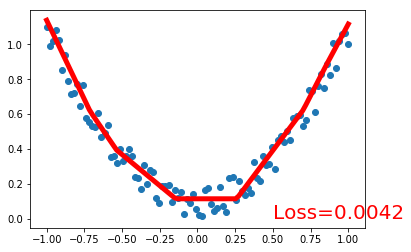

In [7]:
#plt.ion()   # something about plotting #interactive plotting
#2 is te number of epochs
for t in range(200):
    prediction = net(X)     # input x and predict based on x

    loss = loss_func(prediction, Y)     # must be (1. nn output, 2. target)
    #.zero grad clears the gradients for the next training step (clears the buffer fo the new gradients to get stored into it)
    optimizer.zero_grad()   # clear gradients for next train
    #applys backprop and updates the gradiends
    loss.backward()         # backpropagation, compute gradients
    #all the existing variable with gradients will be upgraded on the basis of their gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(X.data.numpy(), Y.data.numpy())
        plt.plot(X.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        #plt.pause(0.1)

#plt.ioff()
# plt.show()